In [2]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [4]:
%cd /content/mount/MyDrive/CNN/Cat & dog classification

/content/mount/MyDrive/CNN/Cat & dog classification


In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

## Weight Intialization

[Read more](https://keras.io/api/layers/initializers/)

### Convolutional Neural Network Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()
#meka krnne kernal initializer walin. meka convolution wlt wtrk nwi dence wltath danna puluwn.
model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

## Augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

### Training the CNN for 10 epochs using train data

In [9]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),steps_per_epoch=len(train_data)//bs,
                  validation_data=(test_data,test_target),validation_steps=len(test_data)//bs,epochs=10)

Epoch 1/10
699/701 [============================>.] - ETA: 0s - loss: 0.7201 - accuracy: 0.5138

701/701 [==============================] - 24s 25ms/step - loss: 0.7200 - accuracy: 0.5135 - val_loss: 0.6934 - val_accuracy: 0.4930
Epoch 2/10
701/701 [==============================] - 16s 22ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 3/10
701/701 [==============================] - 16s 22ms/step - loss: 0.6932 - accuracy: 0.5008
Epoch 4/10
701/701 [==============================] - 16s 22ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 5/10
701/701 [==============================] - 16s 22ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 6/10
701/701 [==============================] - 16s 23ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 7/10
701/701 [==============================] - 16s 23ms/step - loss: 0.6932 - accuracy: 0.4971
Epoch 8/10
701/701 [==============================] - 16s 23ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 9/10
701/701 [==============================] - 16s 23ms/step - loss: 0.6932 - accuracy: 0.4960
Epoch 10/10
701/701 [==============================

### Visualizing the loss and the accuracy of trained CNN

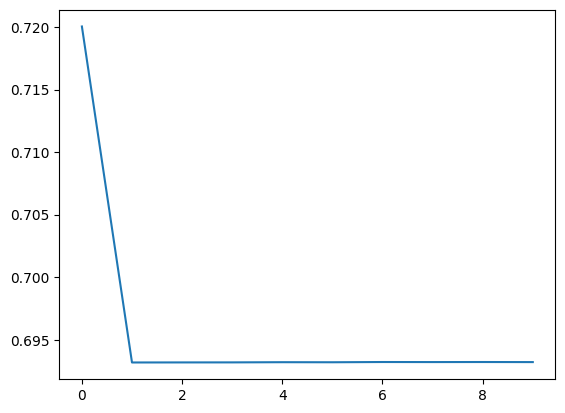

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

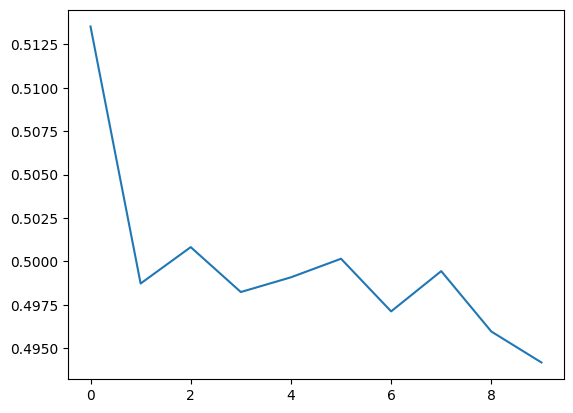

In [11]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [12]:
print(model.evaluate(test_data,test_target))

78/78 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.4930
[0.6933301687240601, 0.49298596382141113]


In [14]:
predicted_target=model.predict(test_data)

78/78 [==============================] - 0s 5ms/step


In [15]:
from sklearn.metrics import classification_report
classification_report(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1265\n           1       0.49      1.00      0.66      1230\n\n    accuracy                           0.49      2495\n   macro avg       0.25      0.50      0.33      2495\nweighted avg       0.24      0.49      0.33      2495\n'